In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
video_json_1 = open('video_api_data_full\\full_videos_output_1_50.json')
video_json_2 = open('video_api_data_full\\full_videos_output_51_100.json')

In [4]:
video_data_1 = json.load(video_json_1)
video_data_2 = json.load(video_json_2)

In [5]:
print(len(video_data_1['items']))
print(len(video_data_2['items']))

50
50


In [6]:
video_data_1['items'][0]

{'id': 'TJ2ifmkGGus',
 'snippet': {'publishedAt': '2023-01-28T21:00:00Z',
  'title': '1,000 Blind People See For The First Time'},
 'contentDetails': {'duration': 'PT8M1S'},
 'statistics': {'viewCount': '101200476',
  'likeCount': '8229283',
  'favoriteCount': '0',
  'commentCount': '343887'}}

In [59]:
columns = [
    'id'
    , 'title'
    , 'publishedAt'
    , 'duration'
    , 'viewCount'
    , 'likeCount'
    , 'commentCount'
]
df = pd.DataFrame(columns=columns)

In [60]:


for video_data in [video_data_1,video_data_2]:
    for item in video_data['items']:
        df.loc[-1] = [
            item['id']
            , item['snippet']['title']
            , item['snippet']['publishedAt']
            , item['contentDetails']['duration']
            , item['statistics']['viewCount']
            , item['statistics']['likeCount']
            , item['statistics']['commentCount']
        ]
        df.index = df.index + 1

In [70]:
import re
from dateutil import parser

# test = df['duration'][0]

# print(re.findall(r'(?:PT)(\d*)(?:M)(\d*)(?:S)', test))
#print(re.findall(r'\d+', test))

def duration_to_seconds(item):
    m_s = re.findall(r'(?:PT)(\d*)(?:M)(\d*)(?:S)', item)
    #print(m_s)
    return (int(m_s[0][0])*60) + (int(m_s[0][1]))

def duration_to_minutes(item):
    m_s = re.findall(r'(?:PT)(\d*)(?:M)(\d*)(?:S)', item)
    #print(m_s)
    return (int(m_s[0][0])) + (int(m_s[0][1])/60)

def published_at_datetime(item):
    return parser.parse(item)



df['seconds'] = df['duration'].apply(lambda x: duration_to_seconds(x))
df['minutes'] = df['duration'].apply(lambda x: duration_to_minutes(x))
df['publishedAt'] = df['publishedAt'].apply(lambda x: published_at_datetime(x))

In [73]:
df[df['publishedAt'] > '2023']

,id,title,publishedAt,duration,viewCount,likeCount,commentCount,seconds,minutes,viewCountMillions
99,TJ2ifmkGGus,"1,000 Blind People See For The First Time",2023-01-28 21:00:00+00:00,PT8M1S,101200476,8229283,343887,481,8.016667,101.200476


In [62]:
df['viewCount'] = df['viewCount'].astype(int)
df['likeCount'] = df['likeCount'].astype(int)
df['commentCount'] = df['commentCount'].astype(int)

In [63]:
df.dtypes

id               object
title            object
publishedAt      object
duration         object
viewCount         int32
likeCount         int32
commentCount      int32
seconds           int64
minutes         float64
dtype: object

In [52]:
df.head()

,id,title,publishedAt,duration,viewCount,likeCount,commentCount,seconds
99,TJ2ifmkGGus,"1,000 Blind People See For The First Time",2023-01-28T21:00:00Z,PT8M1S,101200476,8229283,343887,481
98,7IKab3HcfFk,I Survived 50 Hours In Antarctica,2022-12-24T20:59:59Z,PT12M10S,92959825,3884374,148754,730
97,h5NvTTOlOtI,Hydraulic Press Vs Lamborghini,2022-12-10T21:00:01Z,PT10M25S,110172252,4380170,126247,625
96,0CTp1a-aCUM,"100 Kids Vs 100 Adults For $500,000",2022-12-03T21:00:00Z,PT15M23S,111342807,3173246,93033,923
95,kX3nB4PpJko,"Last To Take Hand Off Jet, Keeps It!",2022-11-12T21:00:00Z,PT15M37S,90459418,3321630,104820,937


In [30]:
df.sort_values(by='seconds')

,id,title,publishedAt,duration,viewCount,likeCount,favoriteCount,commentCount,seconds
80,cV2gBU6hKfY,I Cleaned The World’s Dirtiest Beach #TeamSeas,2021-10-29T19:59:43Z,PT4M55S,87555558,5066692,0,179356,295
48,TDiXxsQ0w2Q,Why I Haven’t Been Uploading,2020-09-17T20:00:05Z,PT6M22S,46351709,2527032,0,98573,382
59,PKtnafFtfEo,"Youtube Rewind 2020, Thank God It's Over",2021-01-01T21:00:03Z,PT6M31S,66276679,4980363,0,290184,391
11,HPJKxAhLw5I,"Planting 20,000,000 Trees, My Biggest Project ...",2019-10-25T19:01:01Z,PT7M23S,85798012,4159608,0,166952,443
99,TJ2ifmkGGus,"1,000 Blind People See For The First Time",2023-01-28T21:00:00Z,PT8M1S,101200476,8229283,0,343887,481
...,...,...,...,...,...,...,...,...,...
25,LdMx2U5tby0,"$60,000 Extreme Hide And Seek - Challenge",2020-01-17T21:00:01Z,PT17M59S,121218064,2395353,0,50655,1079
39,_qAJMXfL6o0,"Would You Rather Have $100,000 OR This Mystery...",2020-06-13T20:00:01Z,PT18M21S,157074989,3240336,0,119844,1101
46,s1ax8Tx_Jz0,Would YOU Rather Have A Lamborghini or This Ho...,2020-08-22T20:00:01Z,PT18M22S,164150669,3446848,0,154026,1102
30,_mdKvblL_8s,"$70,000 Extreme Hide And Seek - Challenge",2020-03-13T20:00:04Z,PT18M41S,105184525,2279233,0,69067,1121


In [65]:
df['viewCountMillions'] = df['viewCount'] / 1000000

Text(0, 0.5, 'View Count (Millions)')

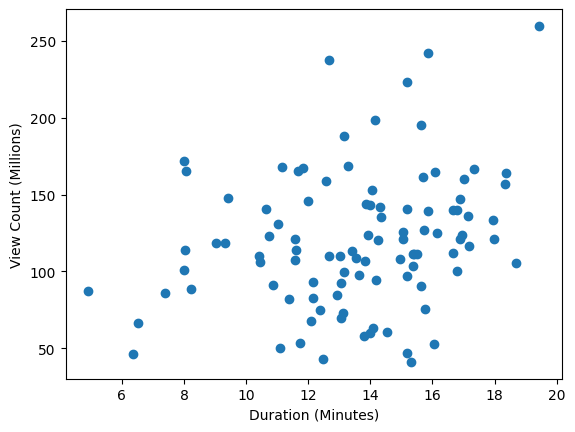

In [68]:
plt.scatter(df['minutes'],df['viewCountMillions'])
plt.xlabel('Duration (Minutes)')
plt.ylabel('View Count (Millions)')

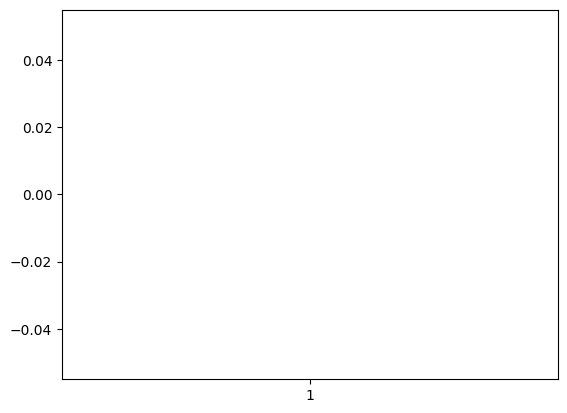

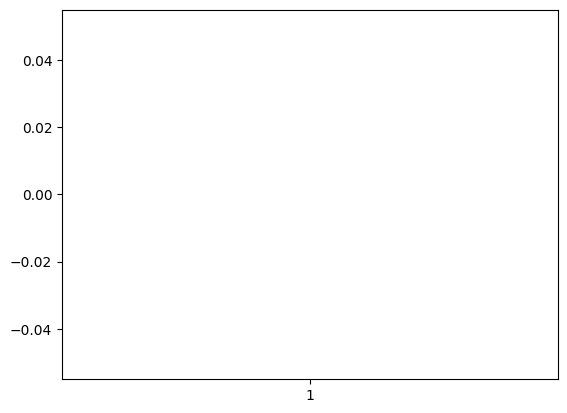

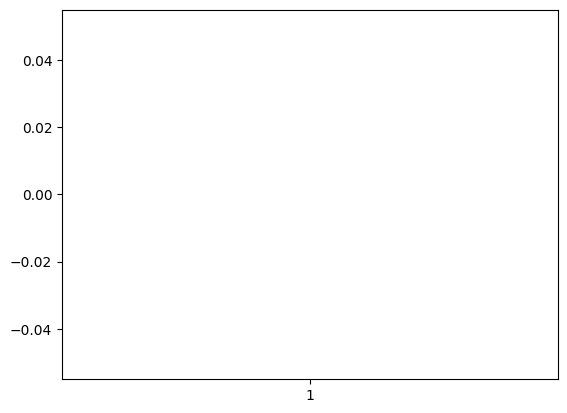

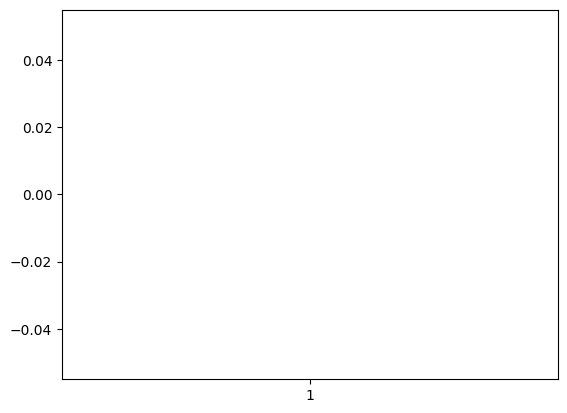

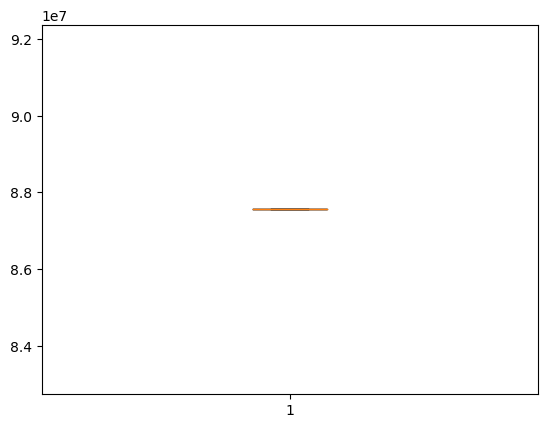

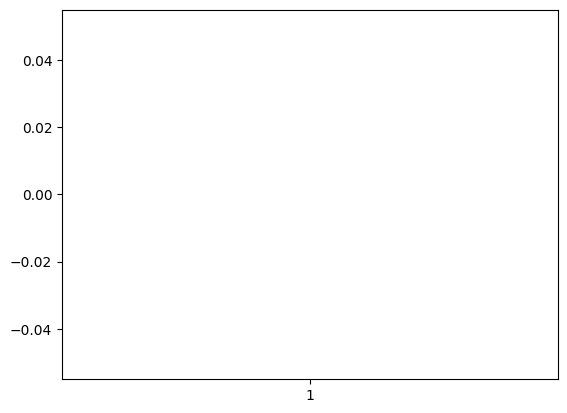

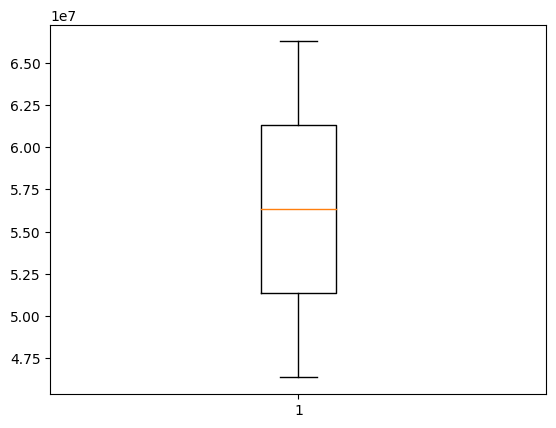

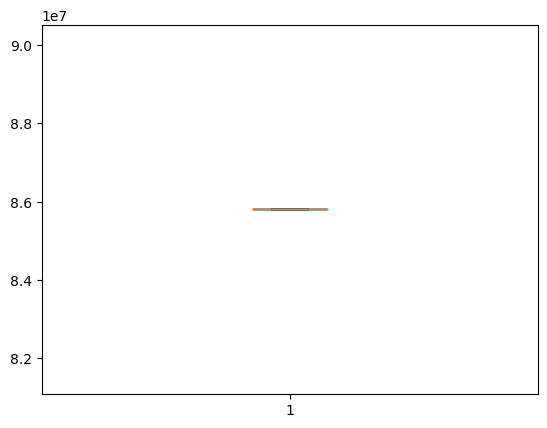

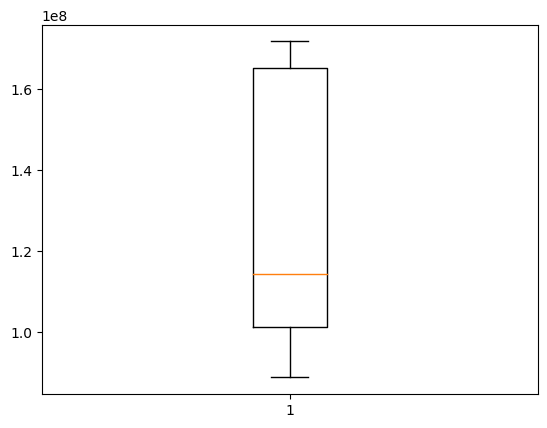

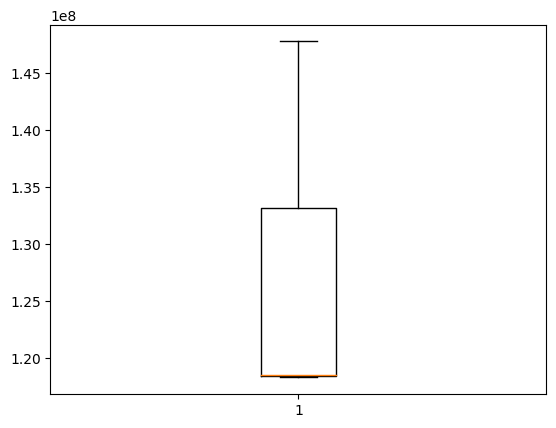

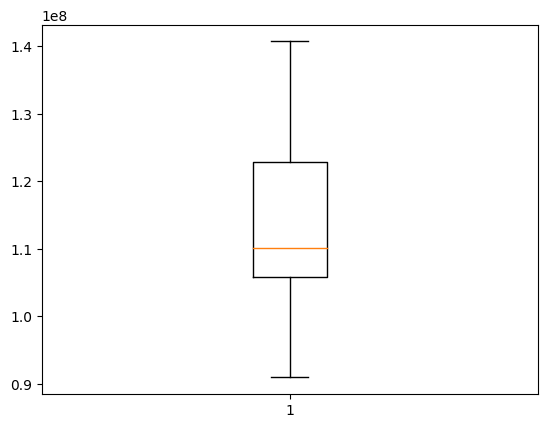

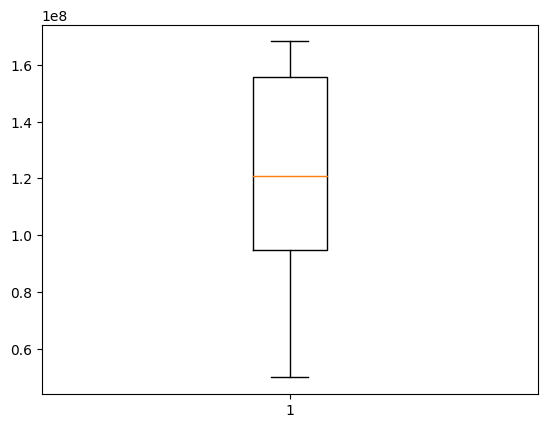

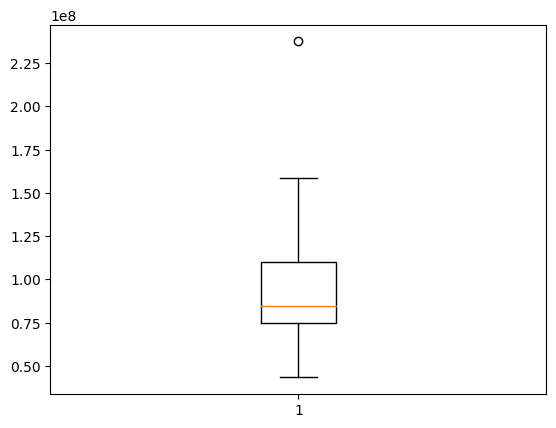

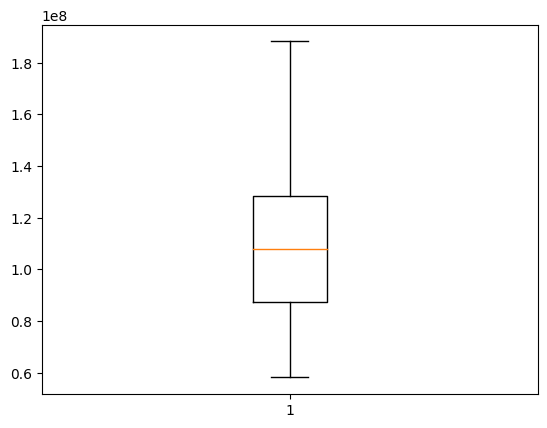

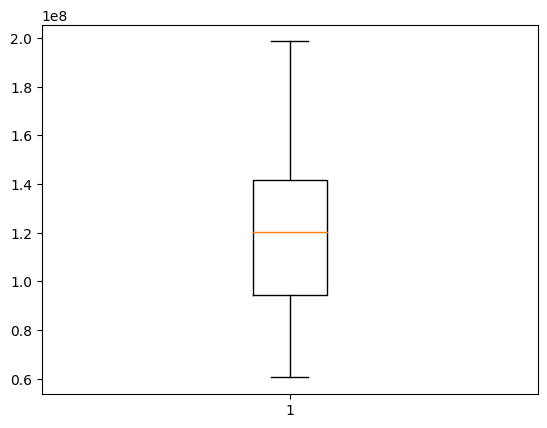

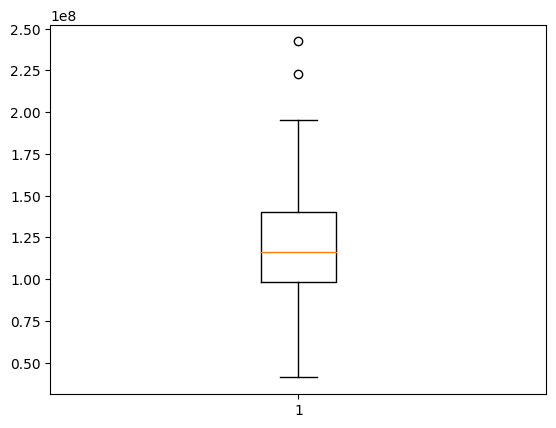

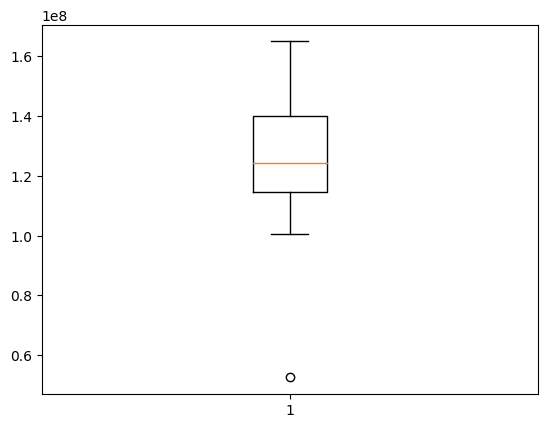

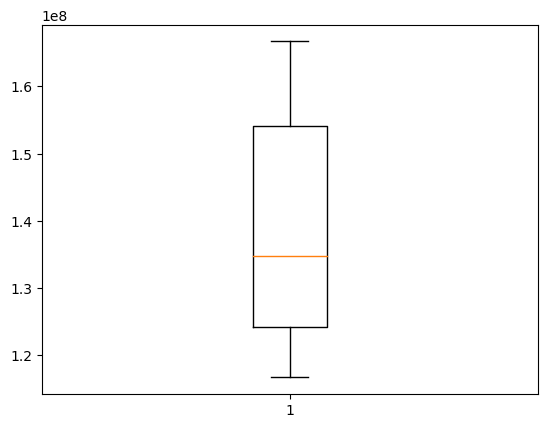

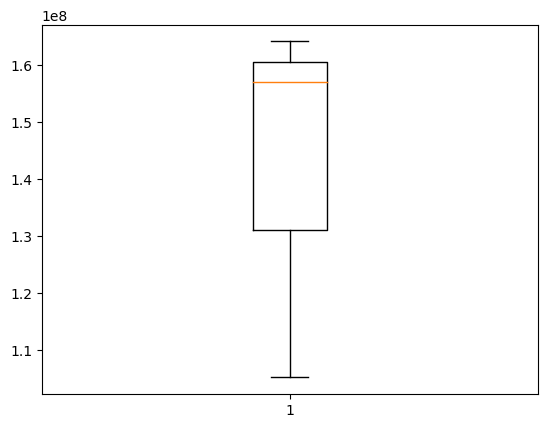

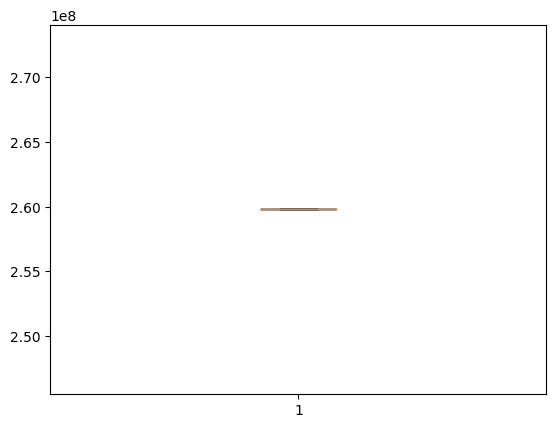

In [94]:
avg_count_time_duration = {}
for a in range(0,20,1):
    curr_df = df[(df['minutes']>a)&(df['minutes']<(a+1))]
    plt.boxplot(curr_df['viewCount'])
    plt.show()
    #median_count
    #avg_count_time_duration[b] = avg_count
    # if avg_count>0:
    #     print(f"Between {a} and {b} minutes : {avg_count}")

In [90]:
avg_count_time_duration

{1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: 87555558.0,
 6: nan,
 7: 56314194.0,
 8: 85798012.0,
 9: 128155065.8,
 10: 128180780.66666667,
 11: 114079040.6,
 12: 118652163.0909091,
 13: 105889830.22222222,
 14: 109762055.4375,
 15: 119441504.55555555,
 16: 125829151.33333333,
 17: 122617809.4,
 18: 139009675.16666666,
 19: 142136727.66666666,
 20: 259785384.0}

<BarContainer object of 20 artists>

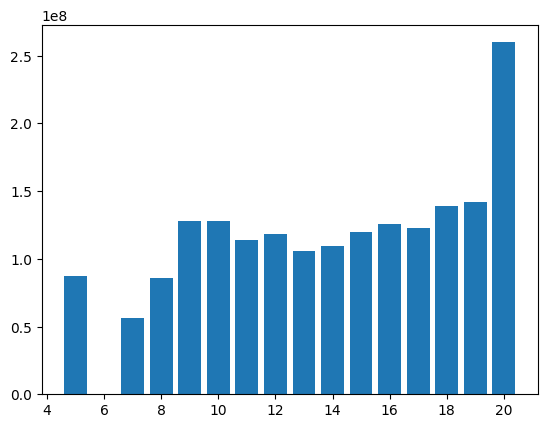

In [91]:
plt.bar(avg_count_time_duration.keys(),avg_count_time_duration.values())

In [95]:
df.minutes.min()

4.916666666666667